In [22]:
import pandas as pd
import re

In [2]:
salesdata = pd.read_csv('sales_data.csv')

In [32]:
program1 = pd.read_csv('program_directory.csv')

In [77]:
zip_codes = pd.read_csv('zip_codes.csv')

In [20]:
zip_codes = list(zip_codes['zip_codes'])
updated_zip_1 = ['0' + str(code) for code in zip_codes if len(str(code)) == 4]
updated_zip_2 = [str(code)[:5] for code in zip_codes if len(str(code)) > 4]
updated_zip_3 = [code for code in updated_zip_2 if code.isdigit()]

new_zip_codes = updated_zip_1 + updated_zip_2 + updated_zip_3
if len(new_zip_codes) == len(salesdata):
    salesdata.loc[:, 'Ticket Order: Postal Code'] = new_zip_codes
else:
    print("unable")

unable


In [4]:
# salesdata['Ticket Order: State'] = salesdata['Ticket Order: State'].str.upper()
salesdata['Ticket Order: State'].value_counts().tail(20)

Ticket Order: State
PR                    4
Select State          4
AR                    4
ND                    3
-                     2
mass                  2
KS                    2
Massachusettes        2
SD                    2
Rhode Island          2
MA Massachusetts      1
MA - Massachusetts    1
1562                  1
MA01366               1
Massachusetts [MA]    1
mA                    1
MA01564-2635          1
01721-1095            1
2472                  1
Quebec                1
Name: count, dtype: int64

In [5]:
state_pattern = r'^[A-Z]{2}$'

salesdata = salesdata[salesdata['Ticket Order: State'].str.match(state_pattern, na=False)]

print(salesdata['Ticket Order: State'].value_counts().tail(20))

Ticket Order: State
SC    13
TN    12
MS    12
NV    10
OK    10
MO     9
MT     8
UT     7
NE     7
IA     6
NM     6
AL     6
WY     5
KY     4
AR     4
PR     4
WV     4
ND     3
SD     2
KS     2
Name: count, dtype: int64


In [6]:
salesdata['Ticket Order: City'] = salesdata['Ticket Order: City'].replace({'worcester': 'Worcester', 'wocester': 'Worcester', 'worester': 'Worcester', 'worcster': 'Worcester', 'worceter': 'Worcester', 'worcestr': 'Worcester',
                                                                          'shrewbury': 'Shrewsbury'})

In [7]:
salesdata['Ticket Order: State'] = salesdata['Ticket Order: State'].replace({'MASSACHUSETTES': 'MA', 'MASSACHUSETTS': 'MA', 'SELECT STATE': ''})
salesdata['Ticket Order: State'] = salesdata['Ticket Order: State'].fillna('')

### Here we did data cleaning ###
First we started with cleaning up the zip codes because many of them had either 4 digits or way over 5 digits so I had to create a new csv file that made all the zip codes 5 digits and only contain integers.
Next we cleaned the states as a large amount of them werent in the format of 2 letters that were uppercase. So we convereted it to fit the format.
Lastly we cleaned up the main ways that Wocester was spelled incorrectly as that accounted for almost 300 missed entries.

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\110jo\AppData\Local\Temp\ipykernel_16176\3650234770.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  salesdata['Event Instance: Date'] = pd.to_datetime(salesdata['Event Instance: Date'], errors='coerce')


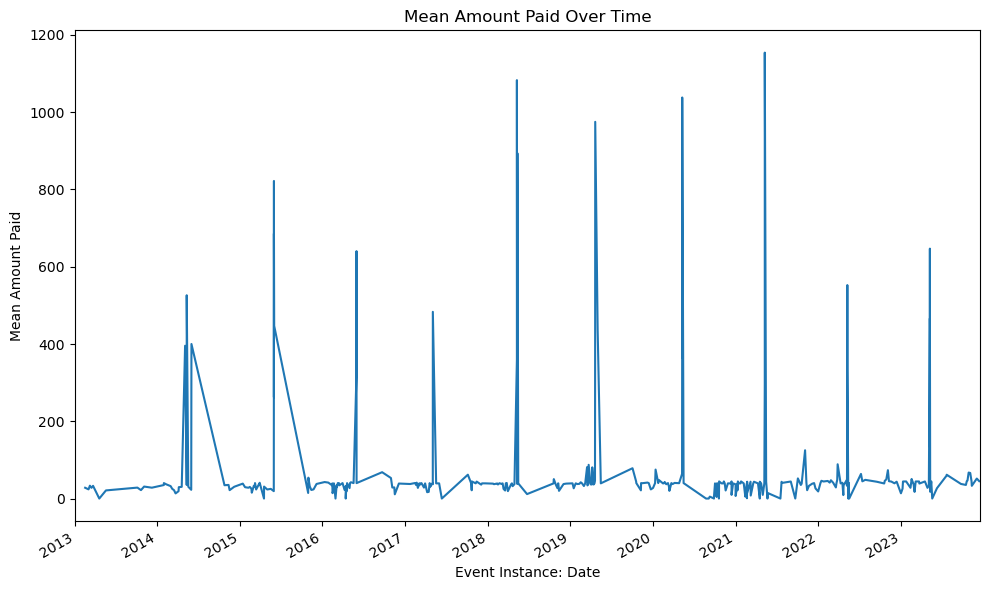

In [8]:
salesdata['Event Instance: Date'] = pd.to_datetime(salesdata['Event Instance: Date'], errors='coerce')

start_date = '2013-01-01'
end_date = pd.Timestamp.now()

filtered_data = salesdata[(salesdata['Event Instance: Date'] >= start_date) & (salesdata['Event Instance: Date'] <= end_date)]

s = filtered_data.groupby('Event Instance: Date')['Amount Paid'].mean()
s.plot(figsize = (10,6))
plt.title('Mean Amount Paid Over Time')
plt.xlabel('Event Instance: Date')
plt.ylabel('Mean Amount Paid')
plt.xlim(start_date, end_date) 
plt.tight_layout()
plt.show()

### The data here shows a spike in sale price with intervals of every 6 months give or take, possibly they have fancier events every 6 months? ###

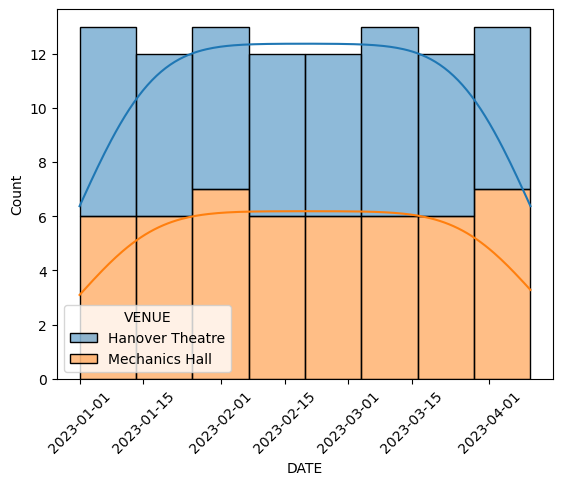

In [9]:
data = {
    'DATE': pd.date_range('2023-01-01', periods=100),
    'VENUE': ['Hanover Theatre', 'Mechanics Hall'] * 50 
}
program = pd.DataFrame(data)

sns.histplot(data=program, x='DATE', hue='VENUE', multiple="stack", kde=True)
plt.xticks(rotation=45)
plt.show()

### Visualization testing ###
Here we created two visualizations, one for the salesdata csv file and one for the program csv file.
These were just formalities for testing what we wanted to possibly find in the data.
We did find the instances of major events being every 6 or so months, which helped us form a proper report for Music Worcester.

### Visualizations ###

In [36]:
print(program1.columns)

Index(['DATE', 'MAIN PERFORMER(S)', 'SOLOIST(S)', ' ARTIST FEE ', ' INCOME ',
       ' Profit ', 'VENUE', 'PROGRAM', 'NOTES', 'ARCHIVE CAPTURED?'],
      dtype='object')


In [96]:
program1_sorted = program1.sort_values(by=' INCOME ', ascending=True)
program1_sorted['INCOME'] = pd.to_numeric(program1_sorted[' INCOME '], errors='coerce')

program1_sorted['INCOME_rounded'] = (program1_sorted['INCOME'] // 1000) * 1000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


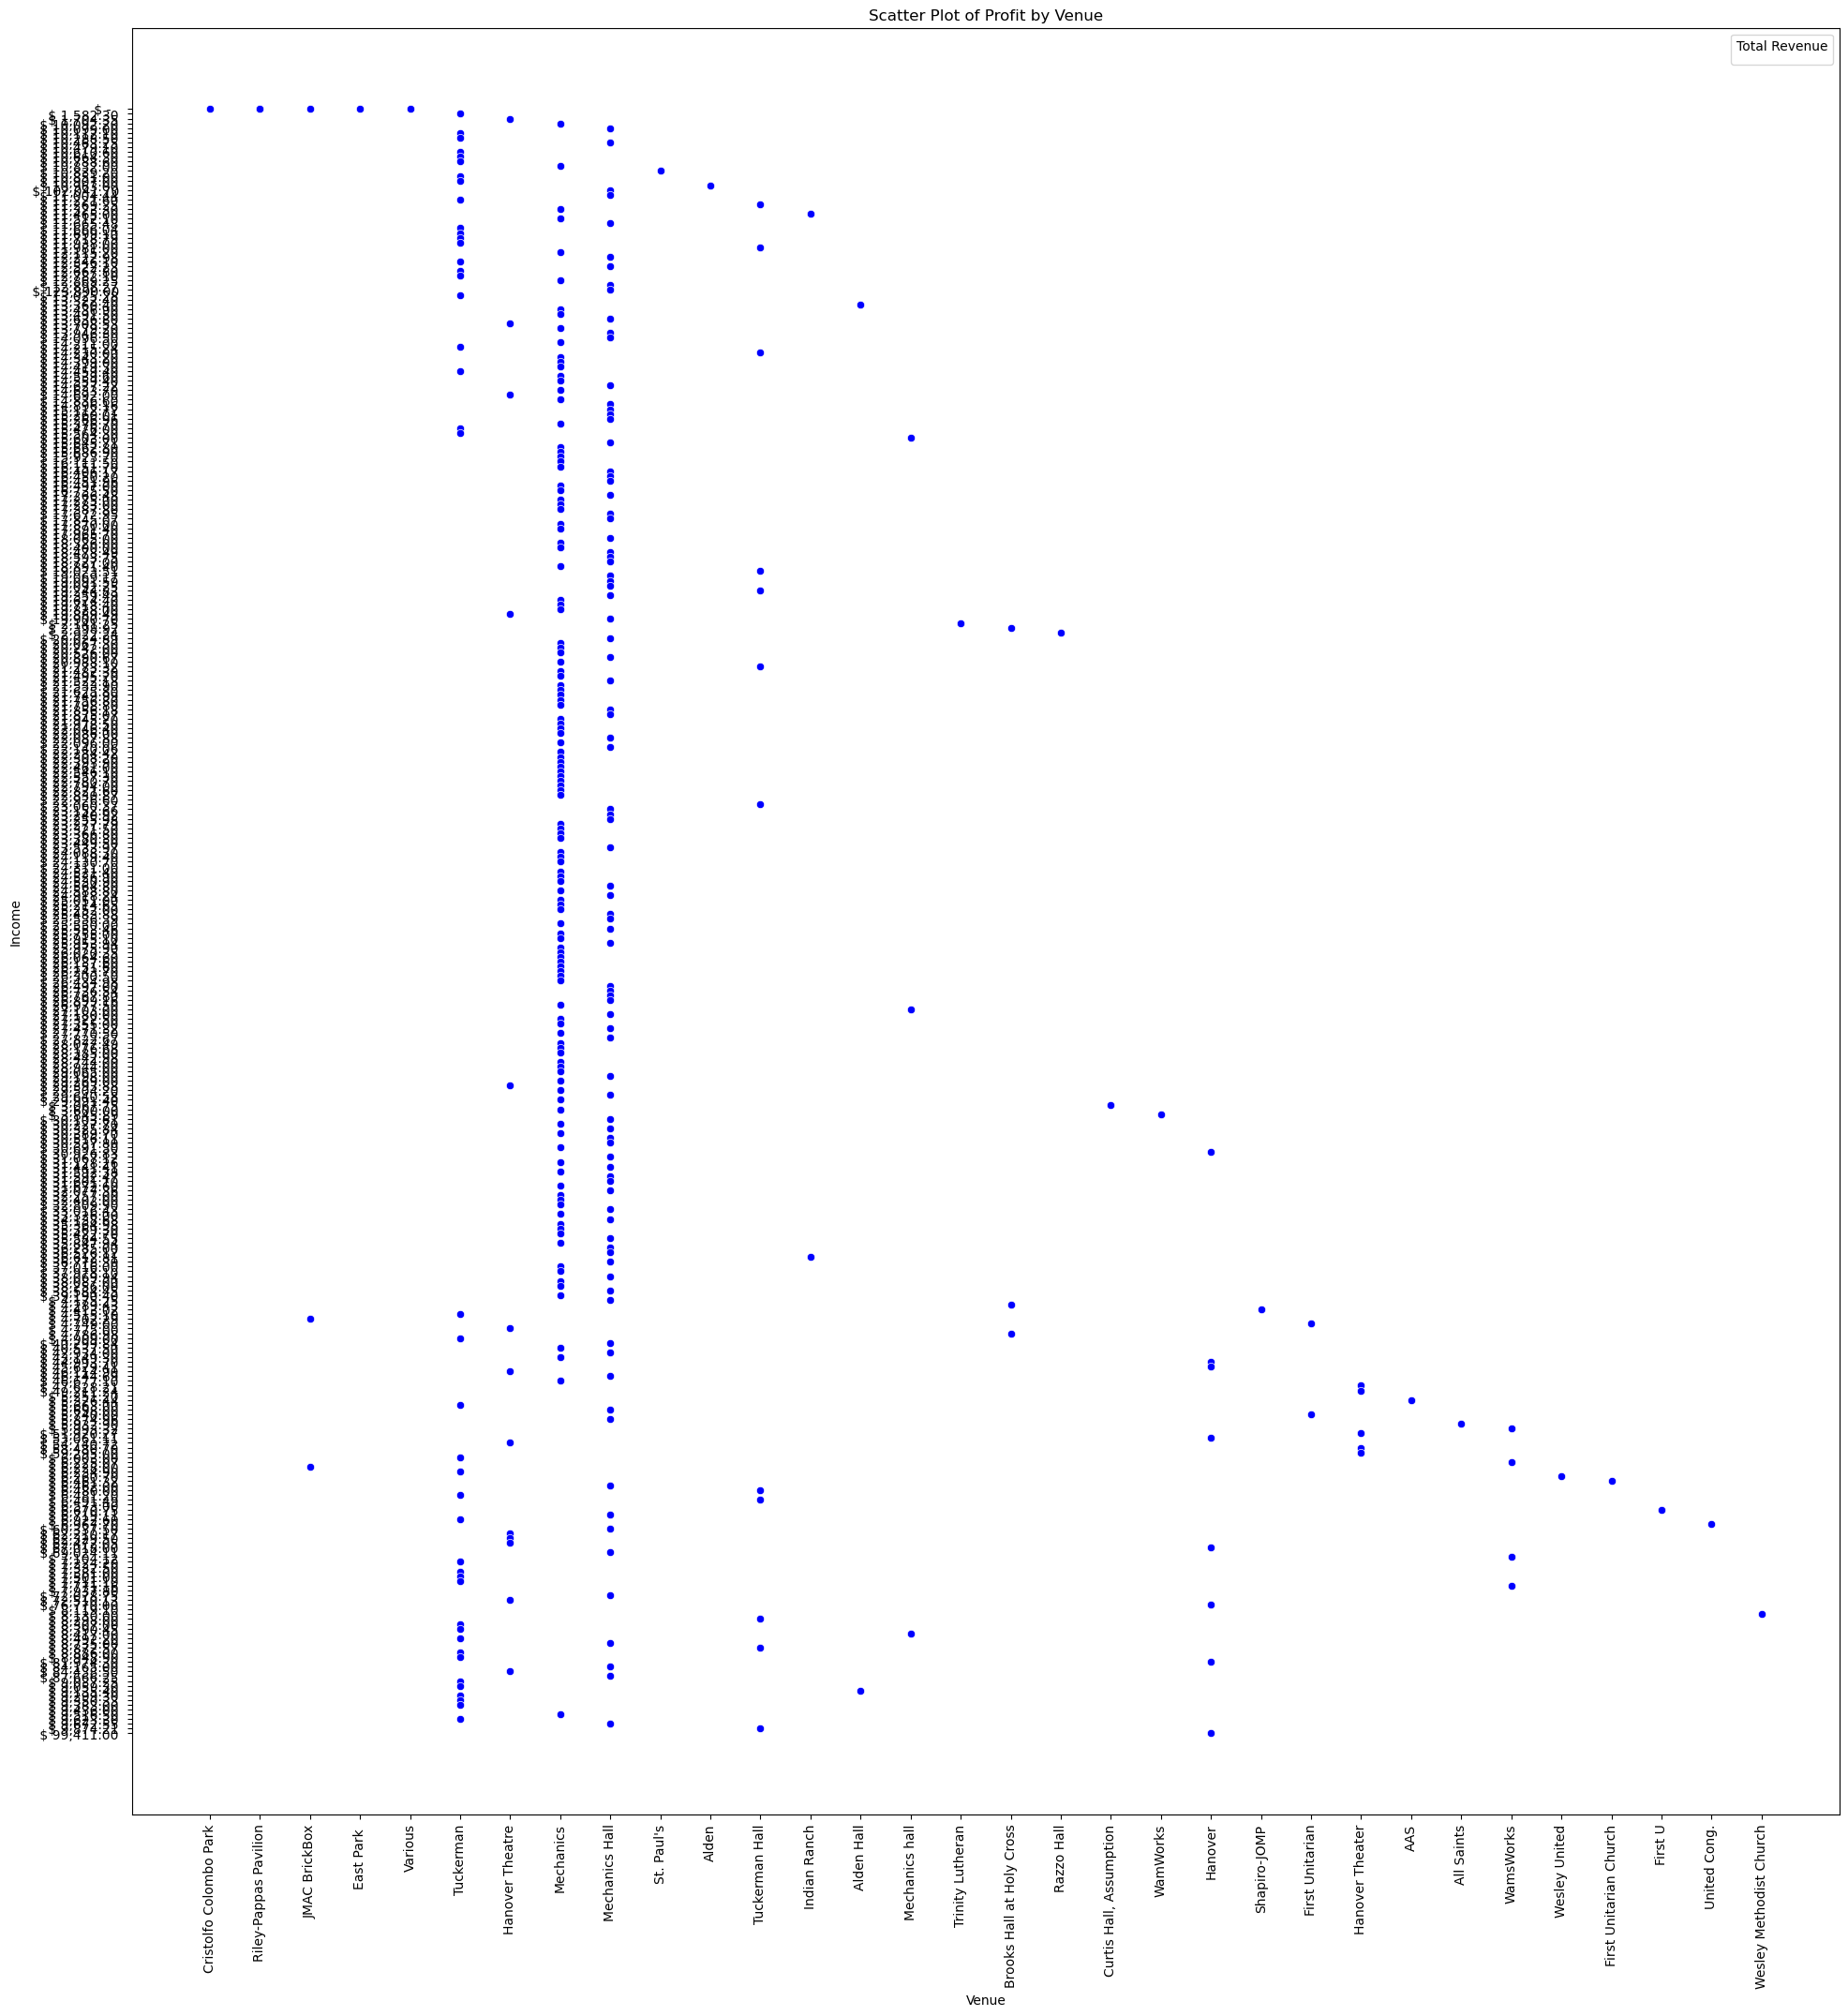

In [97]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x='VENUE', y=' INCOME ', data=program1_sorted, color='blue')

plt.title('Scatter Plot of Profit by Venue')
plt.xlabel('Venue')
plt.ylabel('Income')
plt.legend(title='Total Revenue')

plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

This data purely showed the Income for each venue and every instance. We decided not to group the data but instead just give every instance as it better represnted the spread of values ranging from a couple thousand to a couple hundred thousand for the venues.

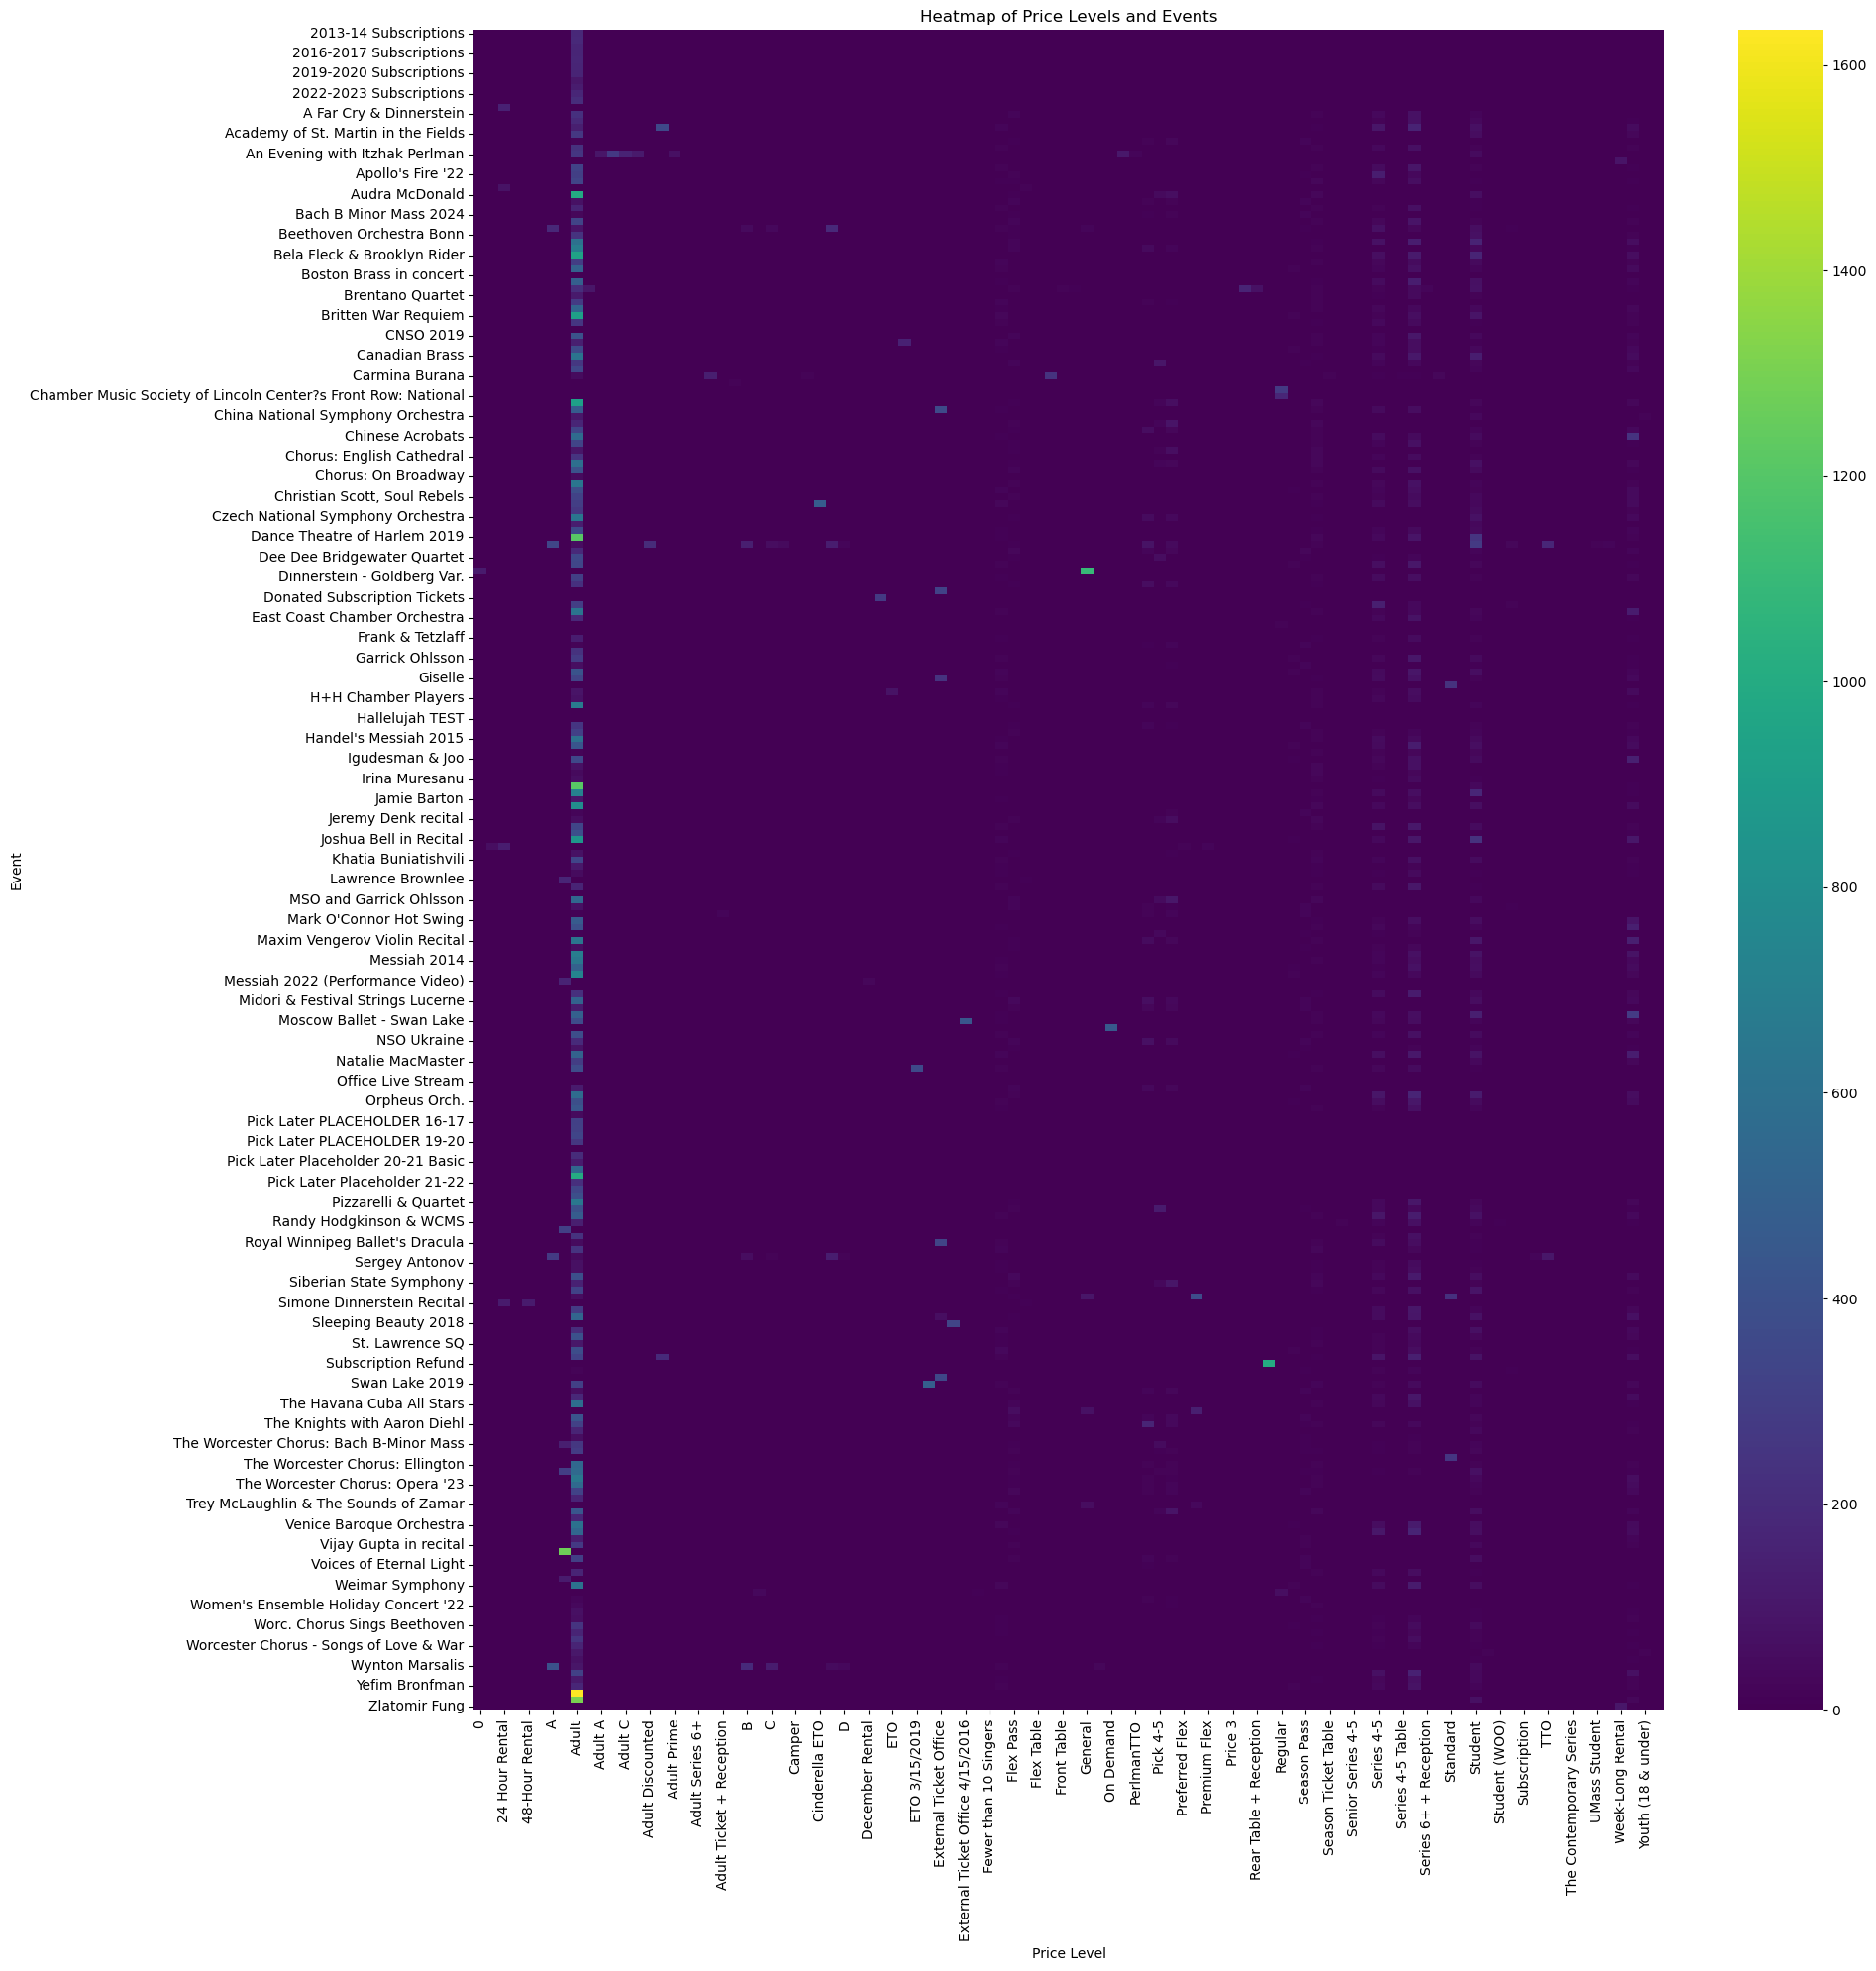

In [94]:
newsalesdata = salesdata.dropna(subset=['Ticket Price Level: Name', 'Ticketable Event: Name'])

pivot_table = newsalesdata.pivot_table(index='Ticketable Event: Name', columns='Ticket Price Level: Name', aggfunc='size', fill_value=0)

plt.figure(figsize=(20,20))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Heatmap of Price Levels and Events')
plt.xlabel('Price Level')
plt.ylabel('Event')
plt.tight_layout()
plt.show()

The heatmap analysis revealed a notable correlation between Adult ticket price levels and the frequency of events, indicating that higher Adult ticket prices corresponded to a greater number of events hosted. This relationship suggests a potential tendency where events with elevated adult ticket prices were more recurrent within the dataset. However, an intriguing exception emerged concerning general ticket price levels, which exhibited a strong correlation with performances involving Dinnerstein and Orchestra.

Other fields that have a slightly higher correlation are Student tickets and Series 6+ tickets. However, these two fields exhibit far less correlation, as by context, they must have been frequent for certain event groups compared to the general grouping associated with the Adult field.

In [11]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\110jo\OneDrive\Desktop\Music Worcester


In [15]:
import csv
from collections import Counter
import pgeocode
import folium
import numpy as np

In [17]:
csv_file = 'zip_codes.csv'

pin = []
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        pin.extend(row)

pin_freq = Counter(pin)
top_100_postal_codes = [code for code, _ in pin_freq.most_common(100)]

nomi = pgeocode.Nominatim('us')
pin = []
postal_codes_data = [] 
for code in top_100_postal_codes:
    location = nomi.query_postal_code(code)
    if not location.empty:
        postal_codes_data.append({
            'postal_code': code,
            'latitude': location.latitude,
            'longitude': location.longitude
        })
        lat = location.latitude
        long = location.longitude
        if not (np.isnan(lat)):
            entry = {'postal_code': code, 'latitude': lat, 'longitude': long}
            pin.append(entry)
            
map_locations = folium.Map(location=[42, -71], zoom_start=7)

# Add markers for each postal code's location
for data in postal_codes_data:
    postal_code = data["postal_code"]
    latitude = data["latitude"]
    longitude = data["longitude"]
    folium.Marker([latitude, longitude], popup=postal_code).add_to(map_locations)

map_locations

We created a hot map plotting the 50 most frequently used zip codes when purchasing tickets to events. 

In [ ]:
for data in pin:  
    postal_code = data["postal_code"]
    latitude = data["latitude"]
    longitude = data["longitude"]
    folium.Marker([latitude, longitude], popup=postal_code).add_to(map_locations)

map_locations.save("interactive_map_music_worcester_zip.html")

Here we just imported the interactive map into an HTML file that the company could access since they didnt have Jupyter Notebook

In [12]:
print(salesdata['Ticket Order: City'].value_counts().head(50))

Ticket Order: City
Worcester        44393
Shrewsbury        5628
Holden            4359
Westborough       3079
Northborough      1793
Auburn            1622
Boylston          1590
Hudson            1376
Princeton         1344
Sterling          1193
Marlborough       1071
Webster            994
Sutton             979
Leominster         924
West Boylston      916
Sturbridge         878
Paxton             871
Spencer            775
Whitinsville       761
Charlton           755
Acton              715
Grafton            678
Harvard            678
Lancaster          668
Berlin             621
Rutland            621
Framingham         607
Millbury           601
Leicester          593
Stow               585
Hopkinton          569
Concord            507
Southborough       504
Upton              501
Sudbury            494
Oxford             493
Uxbridge           473
Bolton             470
Boston             463
North Grafton      459
Jefferson          428
Woodstock          416
Smithfield     

Here I was showing the exact instances of each ticket correlating to the pins on the map.

The vast majority of ticket sales are from Worcester (~51%), with nearby cities of Shrewsbury (~6.5%), Holden (~5%), and Westborough (~3.6%) also contributing significantly (percentages only factor in the top 50 selling towns). A strong majority of ticket sales come from in-state. There are outliers in Smithfield, RI and Woodstock, CT

Ticket sales seem to be mostly concentrated in the surrounding areas with Worcester being the epicenter. There are also more sales towards Boston than western Mass, likely due to higher population and quicker drive times.


In [60]:
from pymongo import MongoClient
from pymongo.errors import ConnectionFailure

# Replace 'admin' and 'password' with your MongoDB admin username and password
username = 'admin'
password = 'password'

# Connection URI
# Assuming your MongoDB is running on the default port 27017
uri = f"mongodb://localhost:27017/"

# Connect to MongoDB
try:
    client = MongoClient(uri)
    
    # The .command() method is a flexible way to run MongoDB commands directly. It's particularly useful for administrative commands that aren't covered by more specific PyMongo methods.
    # For example, the 'ismaster' command is a diagnostic command that returns a document with information about the MongoDB server instance. It is often used to check the status and confirm connectivity to the server.
    client.admin.command('ismaster')

    # If the above command did not raise an exception, we're connected!
    print("MongoDB connection successful.")

except ConnectionFailure as e:
    print(f"MongoDB connection failed: {e}")

MongoDB connection successful.


In [ ]:
mw_sales = client.music_worcester.create_collection('salesdata')

In [61]:
client.list_database_names()

['admin', 'config', 'data_science', 'local', 'music_worcester', 'stores_db']

In [85]:
client.music_worcester.drop_collection('program')

{'nIndexesWas': 1, 'ns': 'music_worcester.program', 'ok': 1.0}

In [63]:
mw_program = client.music_worcester.create_collection('program')
mw_zip = client.music_worcester.create_collection('zip_codes')

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'music_worcester'), 'zip_codes')

In [64]:
client.music_worcester.list_collection_names()

['salesdata', 'zip_codes', 'program']

In [81]:
salesdata_dict = salesdata.to_dict('records')
program_dict = program1.to_dict('records')
zip_dict = zip_codes.to_dict('records')

In [ ]:
mw = client['music_worcester']

collection_s = mw['salesdata']
collection_p = mw['program1']
collection_z = mw['zip_codes']

collection_s.insert_many(salesdata_dict)
collection_p.insert_many(program_dict)
collection_z.insert_many(zip_dict)

Here we just connected to a MongoDB and created 3 collections in a database Music Worcester, Sales data, program, and zip codes. This data stored in dictionaries helped us see the records differently but we didnt do cleaning within MongoDB as we did it all using pandas and or python.

Also as of now all of the Tableau workbooks will be stored in separate files as we couldnt import them into the Jupyter Notebook due to only being able to use the online version. We have 7 visualizations for the two csv files that go over both data sets.

### Profit Based on Performance ###
The analysis involved the creation of a box plot graph to visualize the distribution of profits across various band performances. Upon examination of the box plot, it became evident that the majority of recorded profits were concentrated within a relatively narrow range, predominantly falling between $10,000 and -$15,000. This range outlined the central spread of financial gains and losses across the different band performances. Notably, the most profitable performance was attributed to the Russian National Ballet Theatre, demonstrating a significantly higher profit margin compared to other performances at $51,770 and $42,018.

Conversely, the least profitable performance was associated with Yo Yo Ma's 2 PM show, signifying a considerable financial loss in comparison to other performances in the dataset. This finding underscored the variability in financial outcomes among the different band performances, with Yo Yo Ma's 2 PM show standing out as the performance with the lowest recorded profit at $-40,835.

### Artist Fee by Year ###
This analysis unveils a relationship between the artist fee, its magnitude, and the event's date. Within this visual representation, the size and prominence of each artist's presence are linked to their respective fee prices and the timing of the event. Notably, instances of certain artists being showcased multiple times are depicted with consistent coloring, yet formed to stand distinctly apart from other instances, displaying a segmentation within the image. This visualization captures the variations in artist appearances, their fee structures, and event schedules, presenting a detailed portrayal of these interrelated factors.

### Artist Fee Contrasting Profit ###
These analyses delve into the relationship between the artist fee and the resulting profit generated by different performers. Robert McDuffie emerged as a significant focal point, illustrating the most notable disparity between the artist fee charged and the resulting net profit. McDuffie commanded an artist fee of $110,000, yet the performance led to a starkly contrasting gross profit of -$30,000. This substantial negative figure highlighted a critical discrepancy in the financial success of the performance.

Conversely, Corps de Ballet's performance showcased a contrasting scenario in the analysis. Despite charging an artist fee of $25,000, the performance yielded a notable gross profit of $42,000. This demonstrated a remarkable financial success, indicating that Corps de Ballet's performance significantly exceeded the artist fee charged, resulting in a substantial positive net profit. The substantial profitability achieved in relation to the artist fee emphasized the efficiency and profitability of Corps de Ballet's performance in generating a substantial financial gain. 

### Artist fee stacked bar chart ###
The first sheet we created was showing the difference between the artist fee 
How much the artist charged versus the profit for every year they were operating 
Stacked bar charts 
We found out that the profit that the gained was far less than what the artist fee was so they should hire cheaper artists 

### Box plot were we saw the income for the music in worcester from each month ###
On average we found that the music in worcester gained the greatest amount of income in the month of december
We found a spike in certain performances in april from a performance Bach Suites 
Spike in december for Messiah
Spike in May from Jazz Trumpet Music 
For the most part for these months they tended do better on average because seasonal changes and holiday performances 

### MAP OF THE US ###
We found the amount that each zip code paid for performances 
We originally compared the top 50 us states and we found out that people traveled a wider range for concerts and we originally thought they would only travel to the east coast 

### Performances at from the last 20 years bubble chart ###
We compared the amount of times they performed at each venue 
Most of their performances we found were at the mechanics hall, which is the closest venue to their office. 